## Task10) In previous exercises, you conducted some experiments with binary classification tasks by implementing three deep networks named as LeNet, AlexNet, VGG. In this task, the data set includes X-ray images of 9 different organs. Therefore, you are expected to extend the implemented models into a multi-class classification task. Modify the data loader to load the Deep Learning Methods for Medical Image Analysis (CM2003) Laboratory Assignment 2 images along with their class labels properly. Extend the LeNet and AlexNet models for multi- class classification tasks. Tune these two models by finding the optimum values of hyperparameters to get the best performance for each of the models and, then, compare the observed results between the two models. Report the learning curves for both of the loss and accuracy values (for train and test data).

In [1]:
# Data Loader
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize

# import tensorflow packages
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation, Dropout
from tensorflow.keras.models import Model

# import pyplot
import matplotlib.pyplot as plt

In [17]:
def gen_labels(im_name):
    '''
    Parameters
    ----------
    im_name : Str
    The image file name.

    Returns
    -------
    Label : Numpy array
    Class label of the filename name based on its pattern.
    '''
    labels = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
    label = np.array([1 if x==im_name[0:2] else 0 for x in labels])
    return label

def get_data(data_path, data_list, img_h, img_w):
    """
    Parameters
    ----------
    train_data_path : Str
    Path to the data directory
    train_list : List
    A list containing the name of the images.
    img_h : Int
    image height to be resized to.
    img_w : Int
    image width to be resized to.
    Returns
    -------
    img_labels : Nested List
    A nested list containing the loaded images along with their
    correcponding labels.
    """
    img_labels = []
    for item in enumerate(data_list):
        img = imread(os.path.join(data_path, item[1]), as_gray = True) # "as_grey"
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        img_labels.append([np.array(img), gen_labels(item[1])])
        if item[0] % 100 == 0:
            print('Reading: {0}/{1} of train images'.format(item[0], len(data_list)))
        
    shuffle(img_labels)
    return img_labels

def get_data_arrays(nested_list, img_h, img_w):
    """
    Parameters
    ----------
    nested_list : nested list
    nested list of image arrays with corresponding class labels.
    img_h : Int
    Image height.
    img_w : Int
    Image width.

    Returns
    -------
    img_arrays : Numpy array
    4D Array with the size of (n_data,img_h,img_w, 1)
    label_arrays : Numpy array
    1D array with the size (n_data).
    """
    
    labels = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
    img_arrays = np.zeros((len(nested_list), img_h, img_w), dtype = np.float32)
    label_arrays = np.zeros((len(nested_list), len(labels)), dtype = np.int32)
    
    for ind in range(len(nested_list)):
        img_arrays[ind] = nested_list[ind][0]
        label_arrays[ind,:] = nested_list[ind][1]
    
    img_arrays = np.expand_dims(img_arrays, axis =3)    
    return img_arrays, label_arrays

def get_train_test_arrays(train_data_path, test_data_path, train_list,
                          test_list, img_h, img_w):
    """
    Get the directory to the train and test sets, the files names and
    the size of the image and return the image and label arrays for
    train and test sets.
    """
    train_data = get_data(train_data_path, train_list, img_h, img_w)
    test_data = get_data(test_data_path, test_list, img_h, img_w)
    train_img, train_label = get_data_arrays(train_data, img_h, img_w)
    test_img, test_label = get_data_arrays(test_data, img_h, img_w)
    del(train_data)
    del(test_data)
    return train_img, test_img, train_label, test_label

img_w, img_h = 128, 128 # Setting the width and heights of the images.
data_path = '/DL_course_data/Lab1/X_ray/' # Path to data root with two subdirs.
train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')
train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)
x_train, x_test, y_train, y_test = get_train_test_arrays(train_data_path, test_data_path, train_list,
                                                         test_list, img_h, img_w)

Reading: 0/5780 of train images
Reading: 100/5780 of train images
Reading: 200/5780 of train images
Reading: 300/5780 of train images
Reading: 400/5780 of train images
Reading: 500/5780 of train images
Reading: 600/5780 of train images
Reading: 700/5780 of train images
Reading: 800/5780 of train images
Reading: 900/5780 of train images
Reading: 1000/5780 of train images
Reading: 1100/5780 of train images
Reading: 1200/5780 of train images
Reading: 1300/5780 of train images
Reading: 1400/5780 of train images
Reading: 1500/5780 of train images
Reading: 1600/5780 of train images
Reading: 1700/5780 of train images
Reading: 1800/5780 of train images
Reading: 1900/5780 of train images
Reading: 2000/5780 of train images
Reading: 2100/5780 of train images
Reading: 2200/5780 of train images
Reading: 2300/5780 of train images
Reading: 2400/5780 of train images
Reading: 2500/5780 of train images
Reading: 2600/5780 of train images
Reading: 2700/5780 of train images
Reading: 2800/5780 of train imag

In [116]:
do_rate = 0.7
def AlexNet(img_ch, img_width, img_height, n_filters_init):
    
    model = Sequential()
    
    model.add(Conv2D(filters=n_filters_init, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=n_filters_init*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=n_filters_init*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=n_filters_init*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=n_filters_init*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(Dropout(do_rate))
    model.add(Activation('relu'))

    model.add(Dense(64))
    model.add(Dropout(do_rate))
    model.add(Activation('relu'))

    model.add(Dense(9))
    model.add(Activation('softmax'))

    model.summary()   
    return model

In [113]:
do_rate = 0.7
def LeNet(img_ch, img_width, img_height, n_base=32):
    model = Sequential()
    model.add(Conv2D(n_base, kernel_size = (3, 3), activation='relu',
                    strides=1, padding='same',
                    input_shape = (img_width, img_height, img_ch)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(n_base*2, kernel_size = (3, 3), activation='relu',
                         strides=1, padding='same'))
        
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(n_base*2, activation='relu'))
    model.add(Dropout(do_rate))
    model.add(Dense(9, activation='softmax'))
    model.summary()
    return model

[1 0 0 0 0 0 0 0 0]


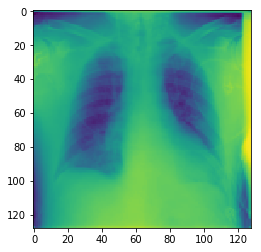

In [20]:
# looking at data
img = 10
plt.imshow(x_train[img,:,:,0])
print(y_train[img])

In [117]:
# training AlexNet

batch_size = 32
epochs = 100
n_base = 8
learning_rate = 0.0001


clf_Alex = AlexNet(1, 128, 128, n_base)
clf_Alex.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()])

clf_Alex_hist = clf_Alex.fit(
                                    x=x_train,
                                    y=y_train,
                                    batch_size=batch_size,
                                    epochs=epochs,
                                    verbose=1,
                                    validation_data=(x_test, y_test),
                                    shuffle=False,                                    
                                    )



Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_165 (Conv2D)          (None, 128, 128, 8)       80        
_________________________________________________________________
activation_248 (Activation)  (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_103 (MaxPoolin (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_166 (Conv2D)          (None, 64, 64, 16)        1168      
_________________________________________________________________
activation_249 (Activation)  (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_104 (MaxPoolin (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_167 (Conv2D)          (None, 32, 32, 32)      

5780/5780 [==============================] - 2s 261us/sample - loss: 0.2426 - categorical_accuracy: 0.9170 - val_loss: 0.2181 - val_categorical_accuracy: 0.9356
Epoch 77/100
5780/5780 [==============================] - 1s 248us/sample - loss: 0.2371 - categorical_accuracy: 0.9201 - val_loss: 0.1661 - val_categorical_accuracy: 0.9489
Epoch 78/100
5780/5780 [==============================] - 1s 248us/sample - loss: 0.2293 - categorical_accuracy: 0.9232 - val_loss: 0.2173 - val_categorical_accuracy: 0.9356
Epoch 79/100
5780/5780 [==============================] - 1s 248us/sample - loss: 0.2371 - categorical_accuracy: 0.9211 - val_loss: 0.1717 - val_categorical_accuracy: 0.9422
Epoch 80/100
5780/5780 [==============================] - 2s 260us/sample - loss: 0.2447 - categorical_accuracy: 0.9140 - val_loss: 0.1702 - val_categorical_accuracy: 0.9444
Epoch 81/100
5780/5780 [==============================] - 1s 250us/sample - loss: 0.2329 - categorical_accuracy: 0.9209 - val_loss: 0.1696 - va

dict_keys(['loss', 'val_loss', 'val_categorical_accuracy', 'categorical_accuracy'])
Training accuracy 0.92231834
Validation accuracy 0.94222224


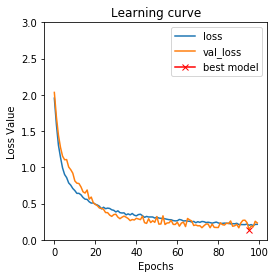

(0, 1)

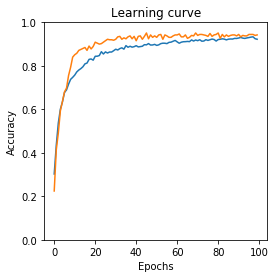

In [118]:
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_Alex_hist.history["loss"], label="loss") #loss is training loss
plt.plot(clf_Alex_hist.history["val_loss"], label="val_loss") #val_loss is validation loss
plt.plot(np.argmin(clf_Alex_hist.history["val_loss"]),
np.min(clf_Alex_hist.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.ylim((0,3))

plt.legend();
print(clf_Alex_hist.history.keys())
print("Training accuracy", clf_Alex_hist.history["categorical_accuracy"][-1])
print("Validation accuracy", clf_Alex_hist.history["val_categorical_accuracy"][-1])
plt.show()

# plotting accuracy curves
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_Alex_hist.history["categorical_accuracy"], label="categorical_accuracy") # training accuracy
plt.plot(clf_Alex_hist.history["val_categorical_accuracy"], label="val_categorical_accuracy") # validation accuracy
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim((0,1))

In [86]:
pred = clf_Alex.predict_classes(x_test)
pred_arr = np.zeros((len(pred),9))
#print(pred_arr)
for i in range(len(pred)):
    pred_arr[i,pred[i]] = 1


In [97]:
pred_bool = []
for i in range(len(pred_arr)):
    pred_bool.append(np.all(y_test[i] == pred_arr[i]))
    
print(np.sum(pred_bool)/len(pred_bool))

0.8955555555555555


In [114]:
# training LeNet

batch_size = 32
epochs = 100
n_base = 32
learning_rate = 0.0001


clf_LeNet = LeNet(1, 128, 128, n_base)
clf_LeNet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()])

clf_LeNet_hist = clf_LeNet.fit(
                                    x=x_train,
                                    y=y_train,
                                    batch_size=batch_size,
                                    epochs=epochs,
                                    verbose=1,
                                    validation_data=(x_test, y_test),
                                    shuffle=False,                                    
                                    )

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_163 (Conv2D)          (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d_101 (MaxPoolin (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_164 (Conv2D)          (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_102 (MaxPoolin (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_35 (Flatten)         (None, 65536)             0         
_________________________________________________________________
dense_101 (Dense)            (None, 64)                4194368   
_________________________________________________________________
dropout_28 (Dropout)         (None, 64)              

Epoch 40/100
5780/5780 [==============================] - 2s 320us/sample - loss: 0.3158 - categorical_accuracy: 0.8683 - val_loss: 0.2090 - val_categorical_accuracy: 0.9311
Epoch 41/100
5780/5780 [==============================] - 2s 320us/sample - loss: 0.3033 - categorical_accuracy: 0.8701 - val_loss: 0.2753 - val_categorical_accuracy: 0.9111
Epoch 42/100
5780/5780 [==============================] - 2s 322us/sample - loss: 0.3143 - categorical_accuracy: 0.8696 - val_loss: 0.2420 - val_categorical_accuracy: 0.9244
Epoch 43/100
5780/5780 [==============================] - 2s 333us/sample - loss: 0.2946 - categorical_accuracy: 0.8758 - val_loss: 0.2434 - val_categorical_accuracy: 0.9133
Epoch 44/100
5780/5780 [==============================] - 2s 319us/sample - loss: 0.2864 - categorical_accuracy: 0.8777 - val_loss: 0.2488 - val_categorical_accuracy: 0.9244
Epoch 45/100
5780/5780 [==============================] - 2s 321us/sample - loss: 0.2950 - categorical_accuracy: 0.8760 - val_loss

dict_keys(['loss', 'val_loss', 'val_categorical_accuracy', 'categorical_accuracy'])
Training accuracy 0.90397924
Validation accuracy 0.9266667


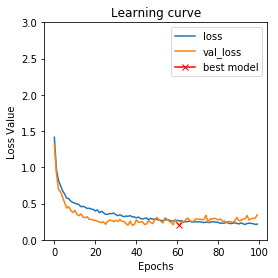

(0, 1)

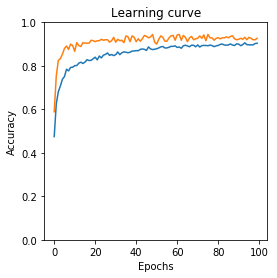

In [115]:
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_LeNet_hist.history["loss"], label="loss") #loss is training loss
plt.plot(clf_LeNet_hist.history["val_loss"], label="val_loss") #val_loss is validation loss
plt.plot(np.argmin(clf_LeNet_hist.history["val_loss"]),
np.min(clf_LeNet_hist.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.ylim((0,3))

plt.legend();
print(clf_LeNet_hist.history.keys())
print("Training accuracy", clf_LeNet_hist.history["categorical_accuracy"][-1])
print("Validation accuracy", clf_LeNet_hist.history["val_categorical_accuracy"][-1])
plt.show()

# plotting accuracy curves
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_LeNet_hist.history["categorical_accuracy"], label="categorical_accuracy") # training accuracy
plt.plot(clf_LeNet_hist.history["val_categorical_accuracy"], label="val_categorical_accuracy") # validation accuracy
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim((0,1))

## Tune these two models by finding the optimum values of hyperparameters to get the best performance for each of the models and, then, compare the observed results between the two models. Report the learning curves for both of the loss and accuracy values (for train and test data).

The AlexNet classified the test images with an accuracy of 0.94 and the LeNet classified them with an accuracy of 0.93. Both of the validation accuracies are slightly higher than the respective train accuracies. Dropout of 0.7 has been used in both cases. The differencem in accuracy is not substantial and could possibly even be reduced by further optimizing the hyperparameters. The loss curves seems to have converged quite well in both cases, thus a substantial improvement in accuracy is not expected when increasing the learning rate. Overall, the networks performance is comparable. 